#### 
# Brazilian E-Commerce Public Dataset by Olist
### 100,000 Orders with product, customer and reviews info
### Data Science project from Kaggle: 
https://www.kaggle.com/olistbr/brazilian-ecommerce

#### 
### Task description
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. 

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. 

Goal of this project is to predict the category of products based on information of the transactions.
#### 


### Feature description

customer_id: key to the orders dataset. Each order has a unique customer_id.

customer_unique_id:unique identifier of a customer.

customer_zip_code_prefix：first five digits of customer zip code

customer_city：customer city name

customer_state：customer state

geolocation_zip_code: first 5 digits of zip code

geolocation_lat: latitude

geolocation_lng: longitude

geolocation_city: city name

geolocation_state: state

order_id: order unique identifier

order_item_id: sequential number identifying number of items included in the same order.

product_id: product unique identifier

seller_id:seller unique identifier

shipping_limit_date：Shows the seller shipping limit date for handling the order over to the logistic partner.

price：item price

freight_value：item freight value item (if an order has more than one item the freight value is splitted between items)

order_id: unique identifier of an order.

payment_sequential: a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.

payment_type: method of payment chosen by the customer.

payment_installments: number of installments chosen by the customer.

payment_value: transaction value.

customer_id: key to the customer dataset. Each order has a unique customer_id.

order_status: Reference to the order status (delivered, shipped, etc).

order_purchase_timestamp: Shows the purchase timestamp.

order_approved_at: Shows the payment approval timestamp.

order_delivered_carrier_date: Shows the order posting timestamp. When it was handled to the logistic partner.

order_delivered_customer_date: Shows the actual order delivery date to the customer.

order_estimated_delivery_date: Shows the estimated delivery date that was informed to customer at the purchase moment

product_name_lenght：number of characters extracted from the product name.

product_description_lenght: number of characters extracted from the product description.

product_photos_qty: number of product published photos

product_weight_g: product weight measured in grams.

product_length_cm: product length measured in centimeters.

product_height_cm: product height measured in centimeters.

product_width_cm: product width measured in centimeters.

seller_id: seller unique identifier

seller_zip_code_prefix: first 5 digits of seller zip code

seller_city: seller city name

seller_state: seller state

product_category: category name in English

### Import libraries and datasets

In [1]:
# import libraries for exploratory data analysis
import pandas as pd # data analysis
import numpy as np # linear algebra

# import libraries to visualise the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load datasets
customers = pd.read_csv('dataset/customers.csv')
sellers = pd.read_csv('dataset/sellers.csv')
products = pd.read_csv('dataset/products.csv')
orders = pd.read_csv('dataset/orders.csv')
order_items = pd.read_csv('dataset/order_items.csv')
order_payments = pd.read_csv('dataset/order_payments.csv')
product_category_name_translation = pd.read_csv('dataset/product_category_name_translation.csv')
geolocation = pd.read_csv('dataset/geolocation.csv')

### Data Overview

Check the head of every datasets at first

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# firstly we need english name of product category instead of original name
products_data = pd.merge(products, product_category_name_translation, on='product_category_name', how='left')

# delete 'product_category_name' column and rename the column
del products_data['product_category_name']

products_data.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [12]:
# check if it successed
products_data.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [13]:
# merge all dataframes into one
data = pd.merge(orders, customers, on='customer_id')
data = data.merge(order_items, on='order_id')
data = data.merge(order_payments, on='order_id')
data = data.merge(products_data, on='product_id')
data = data.merge(sellers, on='seller_id')

data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


In [14]:
data.shape

(117601, 33)

In [15]:
# check the columns it contains
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'product_category',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   customer_unique_id             117601 non-null  object 
 9   customer_zip_code_prefix       117601 non-null  int64  
 10  customer_city                  117601 non-null  object 
 11  customer_state                 117601 non-null  object 
 12  order_item_id                 

#### 
### Exploratory Data Analysis

In [17]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,115903.000000,115903.000000,115903.000000,117581.000000,117581.000000,117581.000000,117581.000000,117601.000000
mean,35051.793097,1.195900,120.824783,20.045990,1.093528,2.939482,172.686752,48.767590,786.950855,2.207881,2114.309497,30.257235,16.630306,23.068574,24441.423049
std,29820.588877,0.697706,184.479323,15.861315,0.726692,2.774223,267.592290,10.035011,653.036231,1.719531,3788.798201,16.190920,13.458952,11.748468,27572.632286
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,11310.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,24315.000000,1.000000,74.900000,16.290000,1.000000,2.000000,108.210000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,58600.000000,1.000000,134.900000,21.190000,1.000000,4.000000,189.260000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28035.000000
max,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


In [18]:
# encode the time value
import datetime

def dt_transform(dataset,columns):
    for col in columns:
        dataset[col] = pd.to_datetime(dataset[col])

time_features = ['order_purchase_timestamp','shipping_limit_date','order_delivered_customer_date',
                 'order_estimated_delivery_date','order_approved_at','order_delivered_carrier_date']

dt_transform(data,time_features)

In [19]:
# introduce some new features
data['order_month'] = data['order_purchase_timestamp'].dt.month
data['order_purchase_dayofweek'] = data['order_purchase_timestamp'].dt.dayofweek
data['order_week'] = data['order_purchase_timestamp'].dt.week
data['Shipping days'] =  (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days
data['On time delivery'] = (data['order_delivered_customer_date'] - data['order_estimated_delivery_date']).dt.days

In [20]:
# check the data type of each columns
# and make list of variables types

# numerical
numerical = [var for var in data.columns if data[var].dtype!='O']

# categorical
categorical = [var for var in data.columns if data[var].dtype == 'O']

print('There are {} numerical variables'.format(len(numerical)))
print('There are {} categorical variables'.format(len(categorical)))

There are 26 numerical variables
There are 12 categorical variables


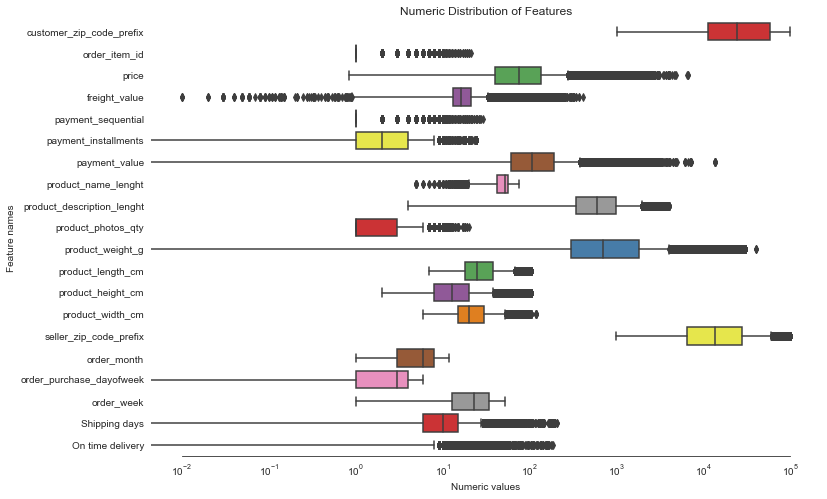

In [21]:
# plot all numeric values
sns.set_style("white")
f, ax = plt.subplots(figsize=(12, 8))
ax.set_xscale("log")
ax = sns.boxplot(data=data[numerical] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

<AxesSubplot:xlabel='order_purchase_date', ylabel='payment_value'>

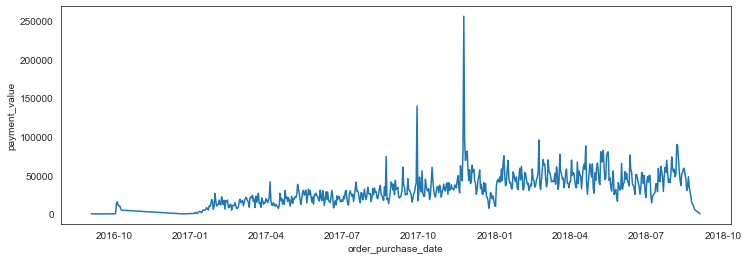

In [22]:
# creating a purchase day feature
data['order_purchase_date'] = data.order_purchase_timestamp.dt.date

# plot the sales per day
sales_per_purchase_date = data.groupby('order_purchase_date', as_index=False).payment_value.sum()
plt.figure(figsize=(12,4))
sns.lineplot(x="order_purchase_date", y="payment_value", data=sales_per_purchase_date)

<AxesSubplot:xlabel='order_purchase_dayofweek', ylabel='payment_value'>

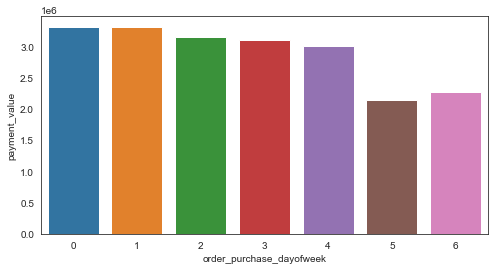

In [23]:
# plot the sales per day of week
sales_per_purchase_dayofweek = data.groupby('order_purchase_dayofweek',as_index=False).payment_value.sum()
plt.figure(figsize=(8,4))
sns.barplot(x="order_purchase_dayofweek", y="payment_value", data=sales_per_purchase_dayofweek)

In [24]:
# show the mean price of each categories 

avg_price_per_category = data.groupby('product_category',as_index=False).agg({'price': ['count', 'mean']})
avg_price_per_category.columns = ['product_category', 'count', 'mean']

# filtering to show only categories with more than 15 orders
avg_price_per_category = avg_price_per_category[avg_price_per_category['count'] > 15]
avg_price_per_category = avg_price_per_category.sort_values(by='mean', ascending=False)

avg_price_per_category

,product_category,count,mean
14,computers,220,1103.689136
64,small_appliances_home_oven_and_coffee,78,627.509103
45,home_appliances_2,268,459.945187
0,agro_industry_and_commerce,252,332.706151
56,musical_instruments,718,293.772604
...,...,...,...
12,christmas_supplies,155,56.947355
37,food_drink,289,56.621211
23,diapers_and_hygiene,39,40.194615
35,flowers,33,33.637576


Text(0.5, 1.0, 'Categories Price')

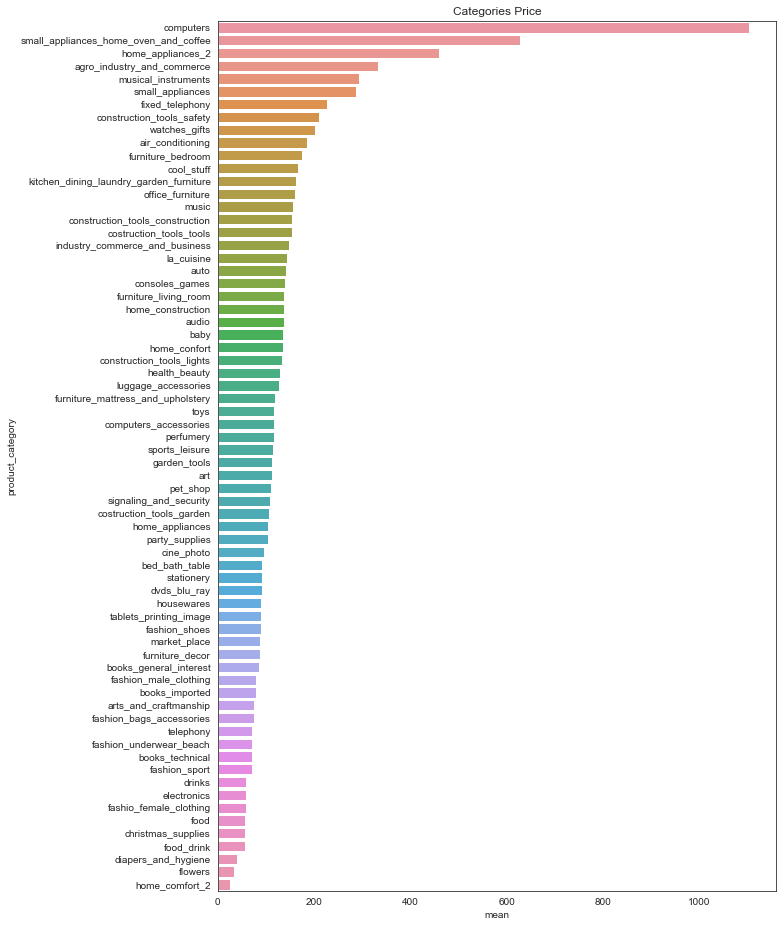

In [25]:
# plot the categories with mean price
plt.figure(figsize=(10,16))
ax = sns.barplot(x="mean", y="product_category", data=avg_price_per_category)
ax.set_title('Categories Price')

In [26]:
# show the total payment of each customer state
pay_per_state = data.groupby('customer_state',as_index=False).agg({'payment_value': ['count', 'sum']})
pay_per_state.columns = ['customer_state', 'count', 'sum']
pay_per_state = pay_per_state.sort_values(by='sum', ascending=False)

pay_per_state

,customer_state,count,sum
25,SP,49566,7597209.66
18,RJ,15327,2769347.44
10,MG,13638,2326151.64
22,RS,6486,1147277.00
17,PR,5962,1064603.99
4,BA,4048,797410.36
23,SC,4302,786343.71
8,GO,2430,513879.00
6,DF,2473,432623.73
7,ES,2338,405805.34


Text(0.5, 1.0, 'Payment in States')

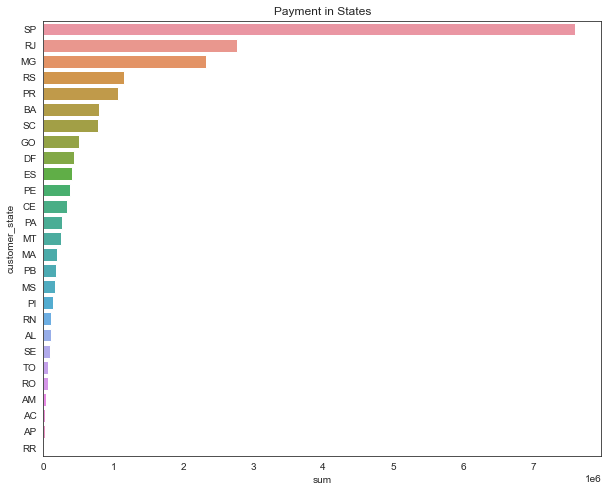

In [27]:
# plot the state with payment on website
plt.figure(figsize=(10,8))
ax = sns.barplot(x="sum", y="customer_state", data=pay_per_state)
ax.set_title('Payment in States')

In [28]:
# see what products the largest buyer have bought
data[data['customer_id']==data['customer_id'].value_counts().index[0]]['product_category'].value_counts()

bed_bath_table    42
housewares        21
Name: product_category, dtype: int64

<AxesSubplot:xlabel='order_status', ylabel='payment_value'>

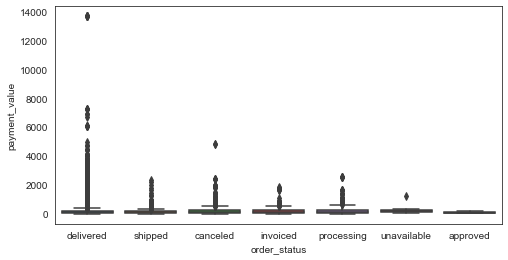

In [29]:
# check the relationship between education level and training hours
plt.figure(figsize=(8,4))
sns.boxplot(x="order_status", y="payment_value",data=data)

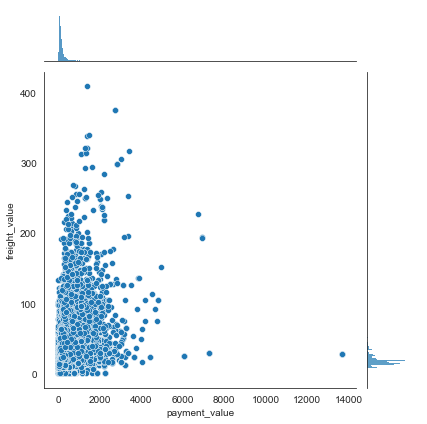

In [30]:
# show the relationship between delivery price and the total payment value
sns.jointplot(x='payment_value',y='freight_value',data=data,kind='scatter')

#### 
### Feature engineering

Firstly we handle all missing values.

In [31]:
# check some basic information
def unqiue_element(x):
    a = len(np.unique(x))
    return a

df_eda = pd.DataFrame(
    [data.dtypes, data.astype(str).apply(unqiue_element), 
    data.isnull().sum()/data.shape[0]]).T

df_eda.columns = ['Data Type', 'Unique Value', 'Percentage of NA']

df_eda

,Data Type,Unique Value,Percentage of NA
order_id,object,98665,0
customer_id,object,98665,0
order_status,object,7,0
order_purchase_timestamp,datetime64[ns],98111,0
order_approved_at,datetime64[ns],90174,0.00012755
order_delivered_carrier_date,datetime64[ns],81017,0.0105866
order_delivered_customer_date,datetime64[ns],95664,0.021828
order_estimated_delivery_date,datetime64[ns],449,0
customer_unique_id,object,95419,0
customer_zip_code_prefix,int64,14976,0


<AxesSubplot:>

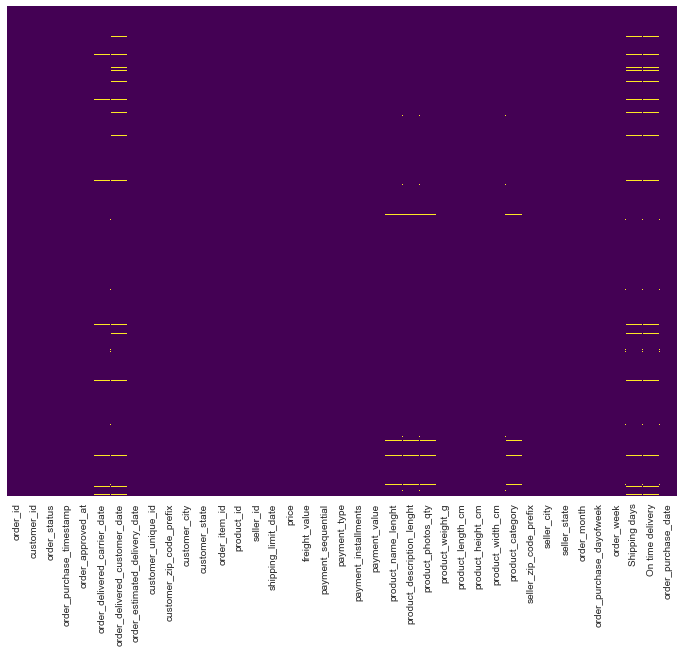

In [32]:
# plot the missing value using heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
# it may cause missing data if the order is unavailable or canceled
data['order_status'].value_counts()

delivered      115035
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: order_status, dtype: int64

In [34]:
# do some encoding and reduce the cardinality of feature order status
data['order_status'].replace({'approved':'processing','unavailable':'canceled'},inplace=True)

In [35]:
# show the missing data of each order status
for status in data['order_status'].unique():
    status_subset = data[data['order_status']==status]
    
    print(status,len(status_subset),'\n',
          status_subset.isnull().sum()[status_subset.isnull().sum()>0].sort_values(ascending=False),'\n')

delivered 115035 
 product_category                 1651
product_photos_qty               1628
product_description_lenght       1628
product_name_lenght              1628
product_width_cm                   20
product_height_cm                  20
product_length_cm                  20
product_weight_g                   20
order_approved_at                  15
On time delivery                    8
Shipping days                       8
order_delivered_customer_date       8
order_delivered_carrier_date        2
dtype: int64 

shipped 1244 
 On time delivery                 1244
Shipping days                    1244
order_delivered_customer_date    1244
product_category                   30
product_photos_qty                 30
product_description_lenght         30
product_name_lenght                30
dtype: int64 

canceled 573 
 On time delivery                 566
Shipping days                    566
order_delivered_customer_date    566
order_delivered_carrier_date     494
product_categ

In [36]:
# missing values are related to the order status,espeicially "delivered date"
# drop all missing data except for date and time feature directly

data = data.dropna(subset=[
    'product_category','product_name_lenght','product_photos_qty',
    'product_description_lenght','product_width_cm',
    'product_height_cm','product_length_cm','product_weight_g'
])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115877 entries, 0 to 117600
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115877 non-null  object        
 1   customer_id                    115877 non-null  object        
 2   order_status                   115877 non-null  object        
 3   order_purchase_timestamp       115877 non-null  datetime64[ns]
 4   order_approved_at              115863 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114672 non-null  datetime64[ns]
 6   order_delivered_customer_date  113382 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115877 non-null  datetime64[ns]
 8   customer_unique_id             115877 non-null  object        
 9   customer_zip_code_prefix       115877 non-null  int64         
 10  customer_city                  115877 non-null  object        
 11  

#### 
### Seperate train and test set

In [38]:
from sklearn.model_selection import train_test_split

X = data.drop(labels='product_category',axis=1)
y = data['product_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

X_train.shape, X_test.shape

((81113, 38), (34764, 38))

#### 
### Categorical encoding

In [39]:
# In this section we handle categorical variables
categorical

['order_id',
 'customer_id',
 'order_status',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'product_id',
 'seller_id',
 'payment_type',
 'product_category',
 'seller_city',
 'seller_state']

In [40]:
# all id features are not helpful for the prediction, we can drop these columns
ID = ['order_id', 'customer_id','order_item_id','customer_unique_id', 'product_id', 'seller_id']

X_train.drop(labels=ID,axis=1,inplace=True)
X_test.drop(labels=ID,axis=1,inplace=True)

In [41]:
# let's explore examples in which variables have more than 10 categories

multi_cat_cols = []

for col in X_train.columns:

    if X_train[col].dtypes =='O': # if variable  is categorical
    
        if X_train[col].nunique() > 10: # and has more than 10 categories
            
            multi_cat_cols.append(col)  # add to the list
            
            print(X_train.groupby(col)[col].count()/ len(X_train)) # and print the percentage of observations within each category
            
            print()

customer_city
abadia dos dourados    0.000012
abadiania              0.000012
abaete                 0.000086
abaetetuba             0.000111
abaiara                0.000012
                         ...   
xinguara               0.000086
xique-xique            0.000025
zacarias               0.000025
ze doca                0.000037
zortea                 0.000012
Name: customer_city, Length: 3729, dtype: float64

customer_state
AC    0.000851
AL    0.003785
AM    0.001479
AP    0.000777
BA    0.034187
CE    0.013611
DF    0.020835
ES    0.019837
GO    0.020552
MA    0.007052
MG    0.115616
MS    0.006953
MT    0.009530
PA    0.009370
PB    0.005523
PE    0.016163
PI    0.004796
PR    0.050399
RJ    0.130707
RN    0.005055
RO    0.002515
RR    0.000419
RS    0.054640
SC    0.036085
SE    0.003501
SP    0.423015
TO    0.002749
Name: customer_state, dtype: float64

seller_city
04482255           0.000012
abadia de goias    0.000012
afonso claudio     0.000037
alambari           0.000025
a

In [42]:
# reduce the cardinality in city features

city_state = ['customer_city','customer_state','seller_city','seller_state']

def rare_encoding(X_train, X_test, variable, tolerance):

    # find the most frequent category
    for var in variable:
        temp = X_train.groupby([var])[var].count() / len(X_train)
        non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    # re-group rare labels
        X_train[var] = np.where(X_train[var].isin(
        non_rare), X_train[var], 'Rare')
    
        X_test[var] = np.where(X_test[var].isin(
        non_rare), X_test[var], 'Rare')

    return X_train,X_test

In [43]:
rare_encoding(X_train,X_test,city_state,0.05)

(      order_status order_purchase_timestamp   order_approved_at  \
 18377    delivered      2018-06-27 19:23:51 2018-06-29 02:53:16   
 92211    delivered      2018-02-11 23:27:52 2018-02-15 03:55:46   
 78122    delivered      2018-05-03 22:29:29 2018-05-03 22:52:43   
 60139    delivered      2018-01-15 11:01:06 2018-01-15 16:51:12   
 24701    delivered      2017-10-22 18:05:08 2017-10-22 18:14:32   
 ...            ...                      ...                 ...   
 5706     delivered      2018-08-19 22:10:33 2018-08-21 04:10:37   
 74372    delivered      2017-08-08 20:39:34 2017-08-09 20:45:10   
 84154    delivered      2017-10-29 21:12:37 2017-10-29 21:25:49   
 84340    delivered      2017-02-24 20:50:22 2017-02-25 11:25:13   
 46250    delivered      2018-05-11 12:27:18 2018-05-12 03:32:26   
 
       order_delivered_carrier_date order_delivered_customer_date  \
 18377          2018-06-29 14:47:00           2018-07-03 18:03:39   
 92211          2018-02-27 23:38:59         

In [44]:
# encode the features city and state into numerical variables
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',
                             variables=city_state)

In [45]:
# fit and transform each column
ordinal_enc.fit(X_train)

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [46]:
# feature zip code is duplicated, we can drop it
X_train.drop('customer_zip_code_prefix',axis=1,inplace=True)
X_test.drop('customer_zip_code_prefix',axis=1,inplace=True)
X_train.drop('seller_zip_code_prefix',axis=1,inplace=True)
X_test.drop('seller_zip_code_prefix',axis=1,inplace=True)

In [47]:
# encode the features order_Status
X_train['order_status'].value_counts()

delivered     79361
shipped         846
canceled        395
processing      258
invoiced        253
Name: order_status, dtype: int64

In [48]:
# convert feature order_status and payment_type into numerical value

OE = OrdinalEncoder(encoding_method='arbitrary',variables=['order_status','payment_type'])

OE.fit(X_train)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['order_status', 'payment_type'])

In [49]:
X_train = OE.transform(X_train)
X_test = OE.transform(X_test)

In [50]:
# replace the missing value with the mean value
X_train['On time delivery'].fillna(value=X_train['On time delivery'].mean(),inplace=True)
X_test['On time delivery'].fillna(value=X_train['On time delivery'].mean(),inplace=True)

X_train['Shipping days'].fillna(value=X_train['Shipping days'].mean(),inplace=True)
X_test['Shipping days'].fillna(value=X_train['Shipping days'].mean(),inplace=True)

In [51]:
# convert values in feature "on time delivery" into binary variables
X_train['On time delivery'] = X_train['On time delivery']<0
X_test['On time delivery'] = X_test['On time delivery']<0

X_train['On time delivery'].replace({True:1,False:0},inplace=True)
X_train['On time delivery'].replace({True:1,False:0},inplace=True)

In [52]:
X_train[['Shipping days','On time delivery']].isnull().sum()

Shipping days       0
On time delivery    0
dtype: int64

In [53]:
# delete the time columns
time_features = ['order_purchase_timestamp','shipping_limit_date','order_delivered_customer_date','order_purchase_date',
                 'order_estimated_delivery_date','order_approved_at','order_delivered_carrier_date']

X_train.drop(labels=time_features,axis=1,inplace=True)
X_test.drop(labels=time_features,axis=1,inplace=True)

In [54]:
X_train.head()

,order_status,customer_city,customer_state,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,...,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,order_month,order_purchase_dayofweek,order_week,Shipping days,On time delivery
18377,0,0,0,15.49,7.39,1,0,1,68.64,59.0,...,25.0,14.0,18.0,0,0,6,2,26,5.0,1
92211,0,0,1,199.90,21.89,1,0,1,221.79,58.0,...,35.0,20.0,20.0,0,0,2,6,6,36.0,0
78122,0,0,0,125.02,12.21,1,1,6,137.23,53.0,...,18.0,8.0,20.0,0,0,5,3,18,6.0,1
60139,0,0,2,248.99,74.69,1,0,1,323.68,53.0,...,75.0,20.0,50.0,1,0,1,0,3,7.0,1
24701,0,1,3,29.00,14.10,1,1,3,86.20,55.0,...,16.0,2.0,11.0,1,0,10,6,42,9.0,1


In [55]:
for i in X_train.columns:
    print(i,':',X_train[i].value_counts())

order_status : 0    79361
1      846
2      395
3      258
4      253
Name: order_status, dtype: int64
customer_city : 0    62559
2    12859
1     5695
Name: customer_city, dtype: int64
customer_state : 0    34312
1    18301
3    10602
2     9378
4     4432
5     4088
Name: customer_state, dtype: int64
price : 59.90     1805
69.90     1485
49.90     1420
89.90     1113
99.90     1078
          ... 
121.75       1
820.05       1
109.73       1
109.77       1
141.75       1
Name: price, Length: 5136, dtype: int64
freight_value : 15.10     2613
7.78      1621
11.85     1387
14.10     1353
18.23     1118
          ... 
98.35        1
237.84       1
46.57        1
74.51        1
93.14        1
Name: freight_value, Length: 6259, dtype: int64
payment_sequential : 1     77683
2      2287
3       456
4       217
5       116
6        84
7        62
8        41
9        36
10       25
11       21
12       18
13       10
15       10
14        8
18        7
16        6
17        5
19        5
20   

#### 
### Discretisation

In [56]:
continuous = ['freight_value','product_description_lenght',
              'product_weight_g','product_length_cm','product_height_cm','product_width_cm']

from feature_engine.discretisation import EqualWidthDiscretiser

disc = EqualWidthDiscretiser(bins=15,variables=continuous)

disc.fit(X_train)

X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

#### 
### Outlier Engineering

In [57]:
# show all int and float values
X_train.select_dtypes(['int','float']).columns

Index(['price', 'payment_value', 'product_name_lenght', 'product_photos_qty',
       'Shipping days'],
      dtype='object')

In [58]:
# check if there are outliers
X_train.describe()

,order_status,customer_city,customer_state,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_name_lenght,...,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,order_month,order_purchase_dayofweek,order_week,Shipping days,On time delivery
count,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,...,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000,81113.000000
mean,0.042188,0.387275,1.319530,120.934108,0.195049,1.091255,0.925536,2.943067,173.084377,48.742717,...,3.039488,1.692750,1.765044,0.391553,0.574717,6.037244,2.749683,24.381086,12.027293,0.923132
std,0.326593,0.744556,1.502507,184.659087,0.595264,0.708974,0.643925,2.775307,266.774327,10.044975,...,2.537670,1.937016,1.617014,0.617118,0.986467,3.220779,1.958904,14.007416,9.391337,0.266384
min,0.000000,0.000000,0.000000,0.850000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,39.900000,0.000000,1.000000,1.000000,1.000000,61.010000,42.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,13.000000,6.000000,1.000000
50%,0.000000,0.000000,1.000000,74.900000,0.000000,1.000000,1.000000,2.000000,108.030000,52.000000,...,2.000000,1.000000,1.000000,0.000000,0.000000,6.000000,3.000000,24.000000,10.000000,1.000000
75%,0.000000,0.000000,2.000000,134.900000,0.000000,1.000000,1.000000,4.000000,190.120000,57.000000,...,4.000000,2.000000,3.000000,1.000000,1.000000,8.000000,4.000000,34.000000,15.000000,1.000000
max,4.000000,2.000000,5.000000,6735.000000,14.000000,28.000000,3.000000,24.000000,13664.080000,76.000000,...,14.000000,14.000000,14.000000,2.000000,3.000000,12.000000,6.000000,52.000000,209.000000,1.000000


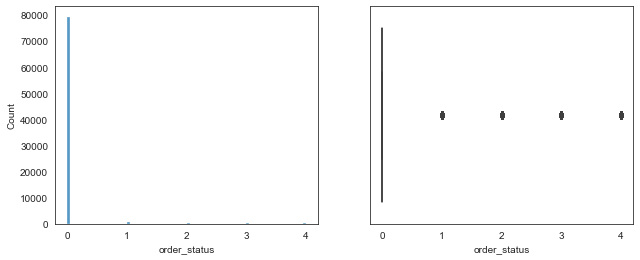

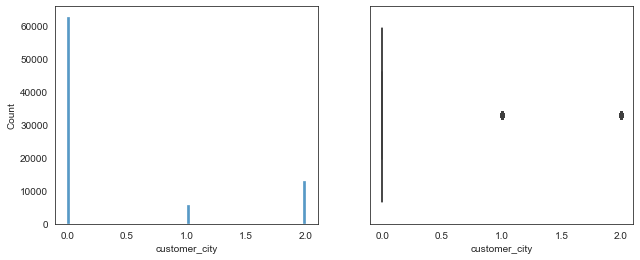

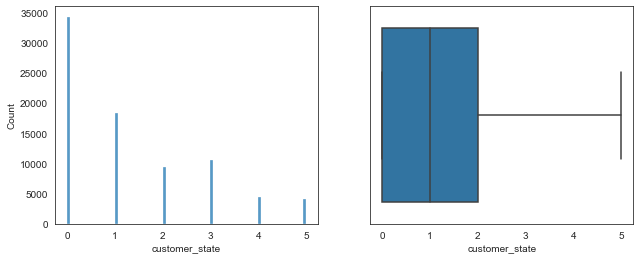

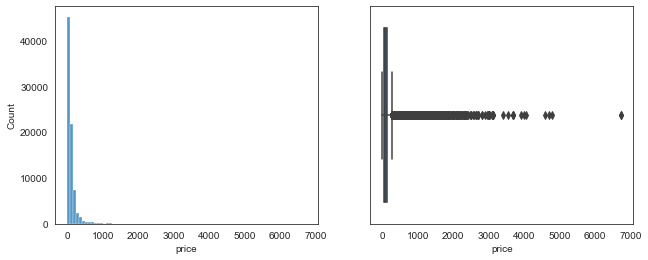

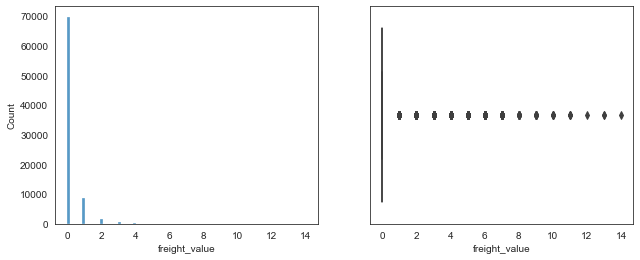

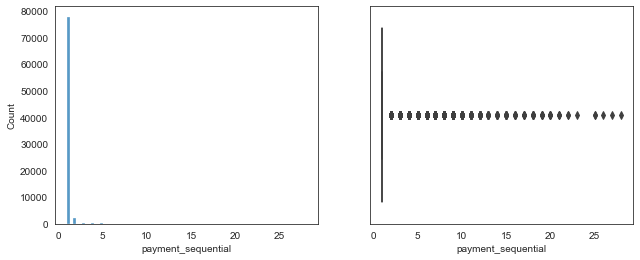

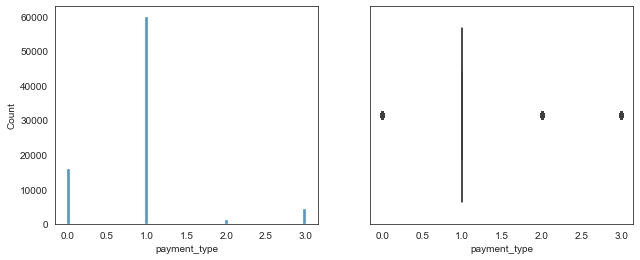

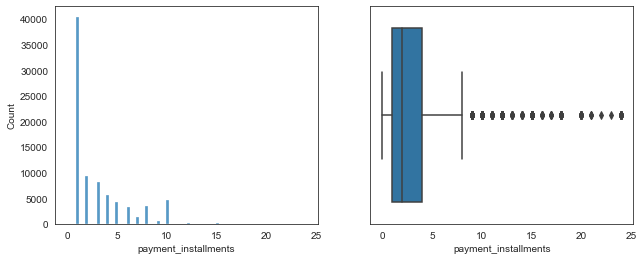

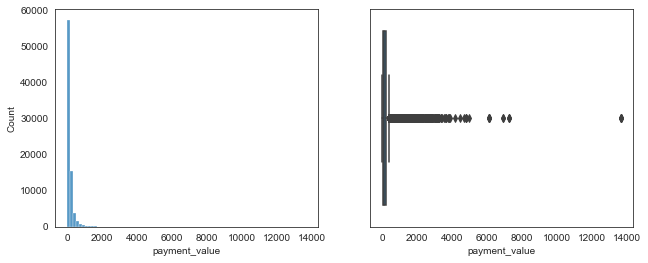

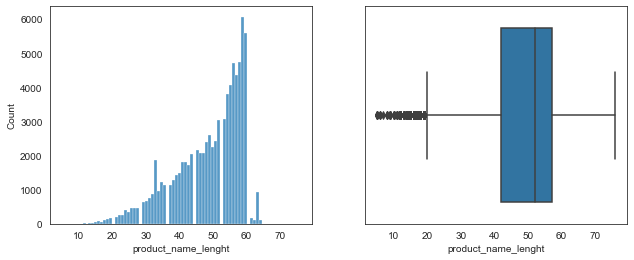

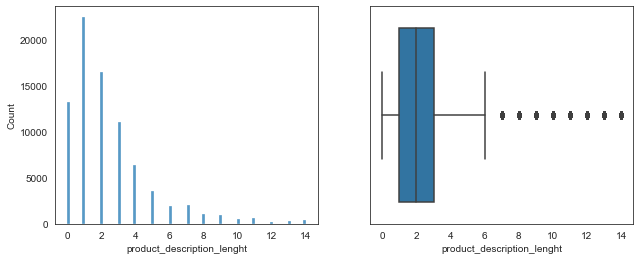

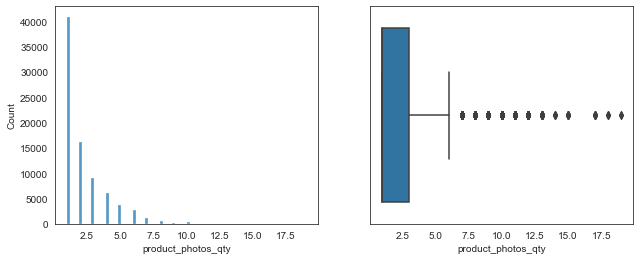

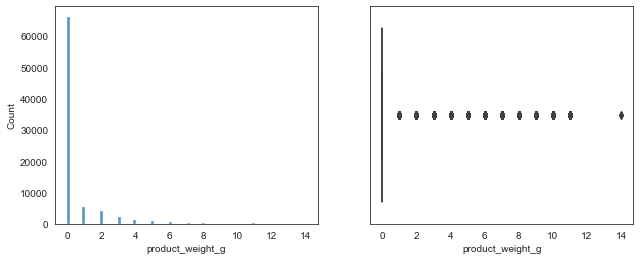

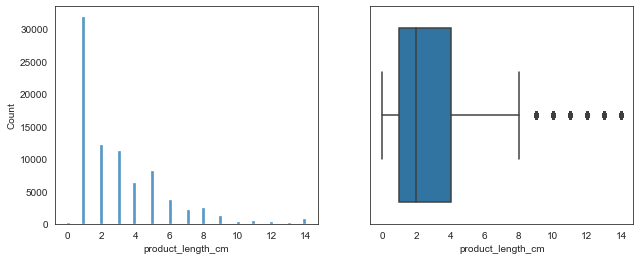

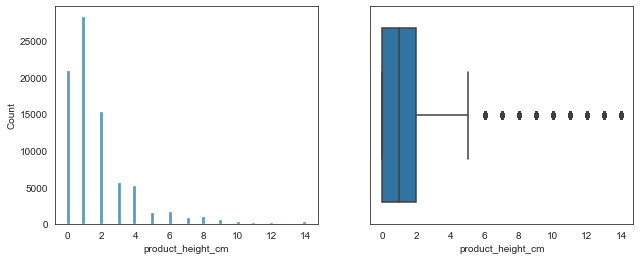

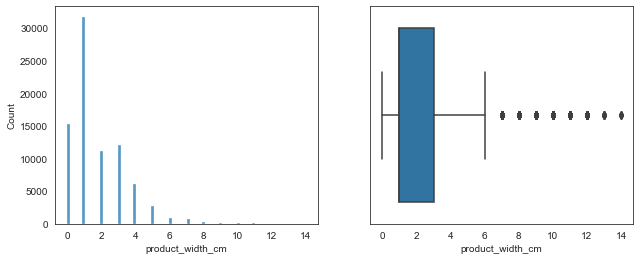

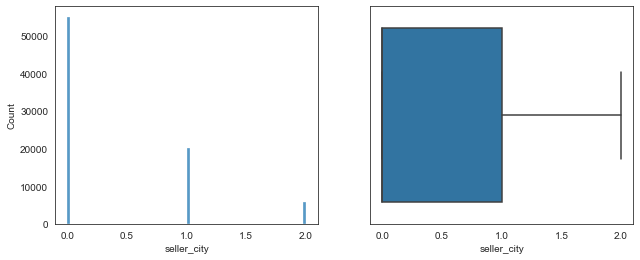

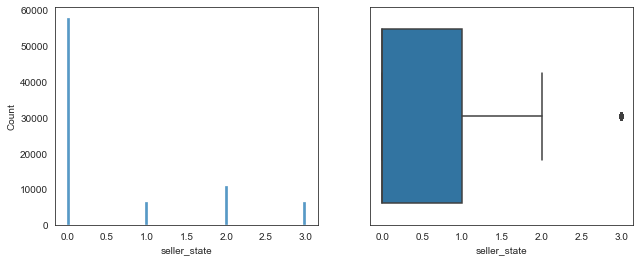

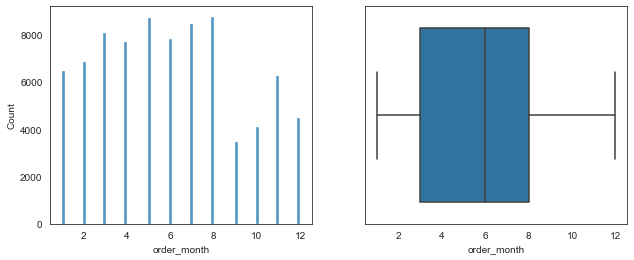

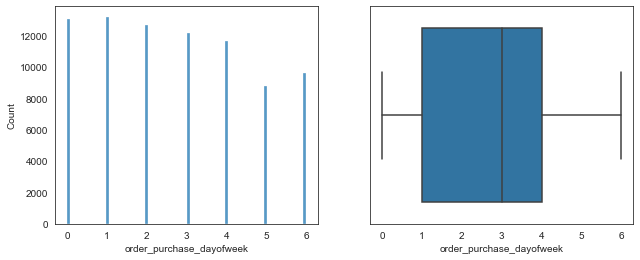

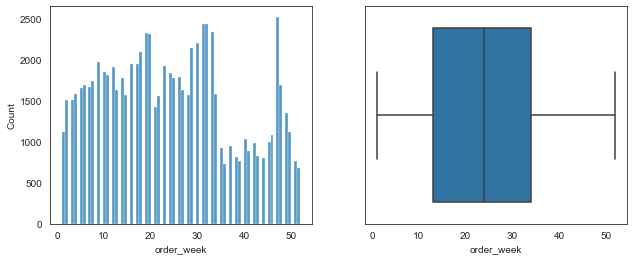

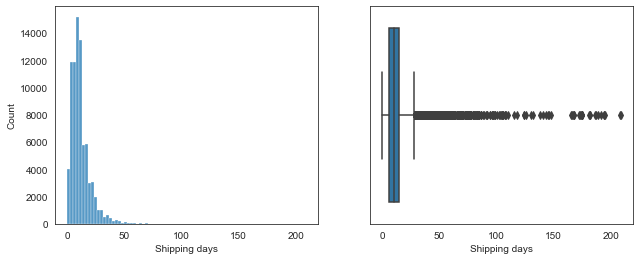

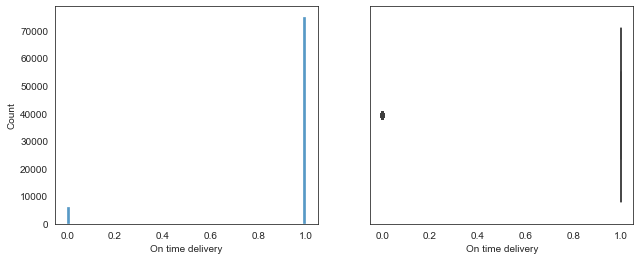

In [59]:
# show the distribution of each continuous features
for feature in X_train.columns:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(x=feature,data=X_train,bins=80)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature,data=X_train)

In [60]:
# import library to handle the outliers
from feature_engine.outliers import Winsorizer

# create the capper
windsoriser1 = Winsorizer(capping_method='iqr', tail='right', fold=1.5,
                          variables=['price','freight_value','payment_value','product_description_lenght','product_photos_qty',
                                     'product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                                    'Shipping days','product_photos_qty','payment_installments'])

windsoriser2 = Winsorizer(capping_method='iqr',tail='left',fold=1.5,
                          variables=['product_name_lenght'])

In [61]:
windsoriser1.fit(X_train)

X_train = windsoriser1.transform(X_train)
X_test = windsoriser1.transform(X_test)

In [62]:
windsoriser2.fit(X_train)

X_train = windsoriser2.transform(X_train)
X_test = windsoriser2.transform(X_test)

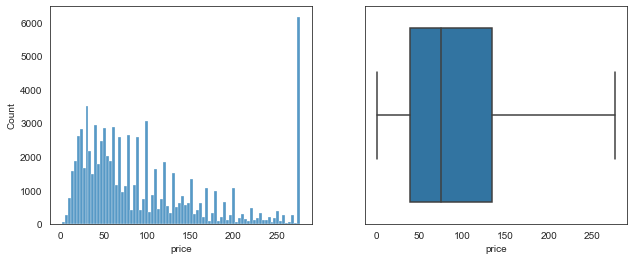

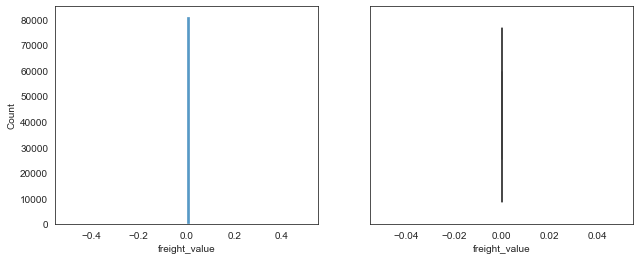

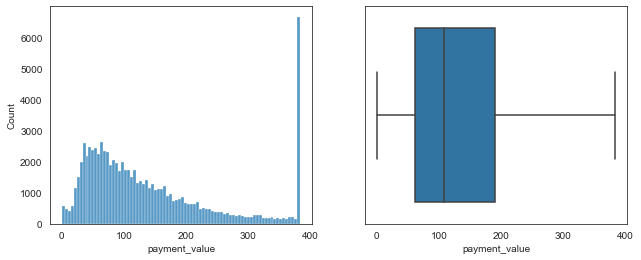

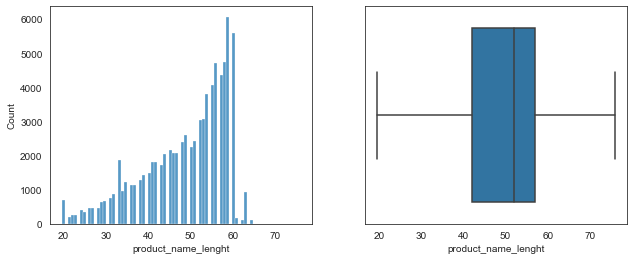

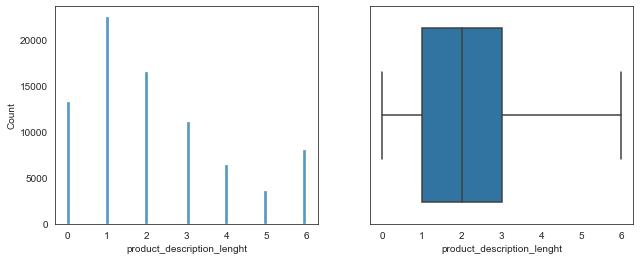

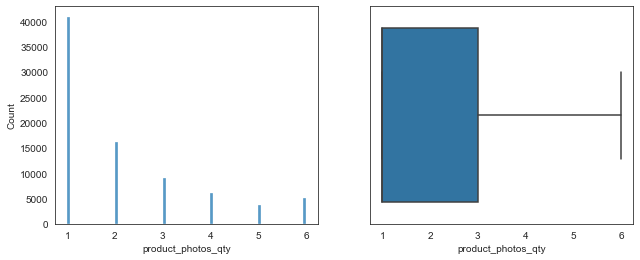

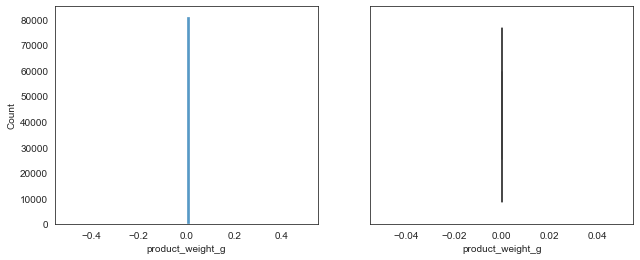

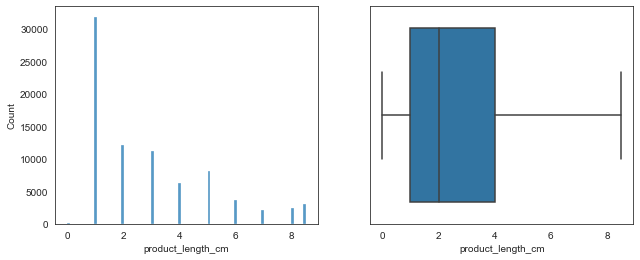

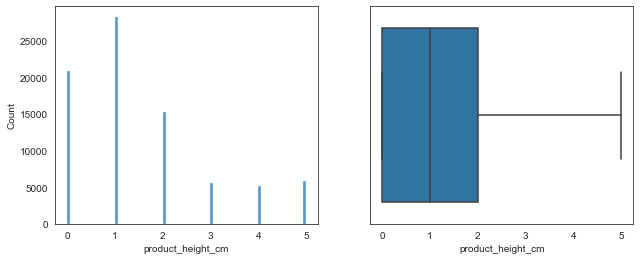

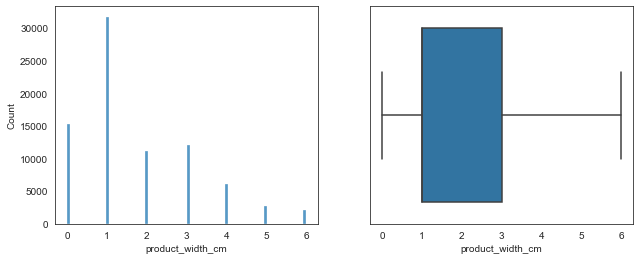

In [63]:
# show the distribution of each continuous features again
for feature in ['price','freight_value','payment_value','product_name_lenght','product_description_lenght',
                'product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.histplot(x=feature,data=X_train,bins=80)
    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature,data=X_train)

#### 
### Feature Selection with feature engine

In [64]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features)

# drop these columns
X_train.drop(labels=constant_features,axis=1,inplace=True)
X_test.drop(labels=constant_features,axis=1,inplace=True)

['freight_value', 'product_weight_g']


In [65]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [66]:
# print the number of quasi-constant features
quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant),quasi_constant

(0, Index([], dtype='object'))

In [67]:
# show the percentage of quasi-constant values
for feature in quasi_constant:
    print(feature, '\n', X_train[feature].value_counts()/np.float(len(X_train)),'\n')
    
# drop these features
X_train.drop(labels=quasi_constant,axis=1,inplace=True)
X_test.drop(labels=quasi_constant,axis=1,inplace=True)

In [68]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20


0

In [69]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

correlated features:  1


In [70]:
# use Wrapper model to select features
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rfe = RFE(model, 15) 
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
print(rfe.ranking_) 

[False False  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True False]
[6 3 1 1 5 2 1 1 1 1 1 1 1 1 1 1 1 1 1 4]


In [71]:
# check these selected features
col_filter = X_train.columns[rfe.support_]
col_filter

Index(['customer_state', 'price', 'payment_installments', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_city', 'seller_state', 'order_month',
       'order_purchase_dayofweek', 'Shipping days'],
      dtype='object')

In [72]:
X_train = X_train[col_filter]
X_test = X_test[col_filter]

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81113 entries, 18377 to 46250
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_state              81113 non-null  int64  
 1   price                       81113 non-null  float64
 2   payment_installments        81113 non-null  float64
 3   payment_value               81113 non-null  float64
 4   product_name_lenght         81113 non-null  float64
 5   product_description_lenght  81113 non-null  float64
 6   product_photos_qty          81113 non-null  float64
 7   product_length_cm           81113 non-null  float64
 8   product_height_cm           81113 non-null  float64
 9   product_width_cm            81113 non-null  float64
 10  seller_city                 81113 non-null  int64  
 11  seller_state                81113 non-null  int64  
 12  order_month                 81113 non-null  int64  
 13  order_purchase_dayofweek   

#### 
### Model building

In [74]:
# import machine learning algorithm models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# import metrics to evaluate the models
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
# train the randomforest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# evaluate the algorithm we just built
pred_rfc = rfc.predict(X_test)
print(confusion_matrix(y_test,pred_rfc),'\n')
print(classification_report(y_test,pred_rfc))

[[  52    0    0 ...    6    0    0]
 [   0   61    0 ...    1    2    0]
 [   0    0   49 ...    1    0    0]
 ...
 [   0    0    0 ... 1291    1   22]
 [   0    0    0 ...    1 1012    7]
 [   0    0    0 ...    7    0 1785]] 

                                         precision    recall  f1-score   support

             agro_industry_and_commerce       0.98      0.70      0.82        74
                       air_conditioning       0.94      0.66      0.78        92
                                    art       0.98      0.80      0.88        61
                  arts_and_craftmanship       0.00      0.00      0.00         8
                                  audio       0.90      0.67      0.77       115
                                   auto       0.81      0.75      0.78      1298
                                   baby       0.90      0.83      0.86       918
                         bed_bath_table       0.91      0.97      0.94      3529
                 books_general_interest 

In [76]:
# train the decision tree model
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

# evaluate the algorithm we just built
pred_tree = dt.predict(X_test)
print(confusion_matrix(y_test,pred_tree),'\n')
print(classification_report(y_test,pred_tree))

[[  55    0    0 ...    5    0    0]
 [   0   50    0 ...    0    5    0]
 [   0    0   50 ...    2    1    1]
 ...
 [   0    0    1 ... 1201    4   18]
 [   0    2    1 ...    7  924    5]
 [   0    1    0 ...   23    2 1660]] 

                                         precision    recall  f1-score   support

             agro_industry_and_commerce       0.81      0.74      0.77        74
                       air_conditioning       0.62      0.54      0.58        92
                                    art       0.78      0.82      0.80        61
                  arts_and_craftmanship       0.14      0.12      0.13         8
                                  audio       0.82      0.81      0.82       115
                                   auto       0.70      0.70      0.70      1298
                                   baby       0.77      0.76      0.77       918
                         bed_bath_table       0.91      0.92      0.92      3529
                 books_general_interest 

In [77]:
# train the xgboost model
xg = xgb.XGBClassifier()
xg.fit(X_train,y_train)

# evaluate the algorithm we just built
pred_xg = xg.predict(X_test)
print(confusion_matrix(y_test,pred_xg),'\n')
print(classification_report(y_test,pred_xg))

[18:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  53    0    0 ...    4    0    0]
 [   0   54    0 ...    1    4    0]
 [   0    0   45 ...    0    0    0]
 ...
 [   0    0    0 ... 1209    0   22]
 [   0    0    0 ...    4  813   12]
 [   0    0    0 ...   14    5 1719]] 

                                         precision    recall  f1-score   support

             agro_industry_and_commerce       0.98      0.72      0.83        74
                       air_conditioning       0.89      0.59      0.71        92
                                    art       1.00      0.74      0.85        61
                  arts_and_craftmanship       0.00      0.00      0.00         8
                                  audio       0.91   